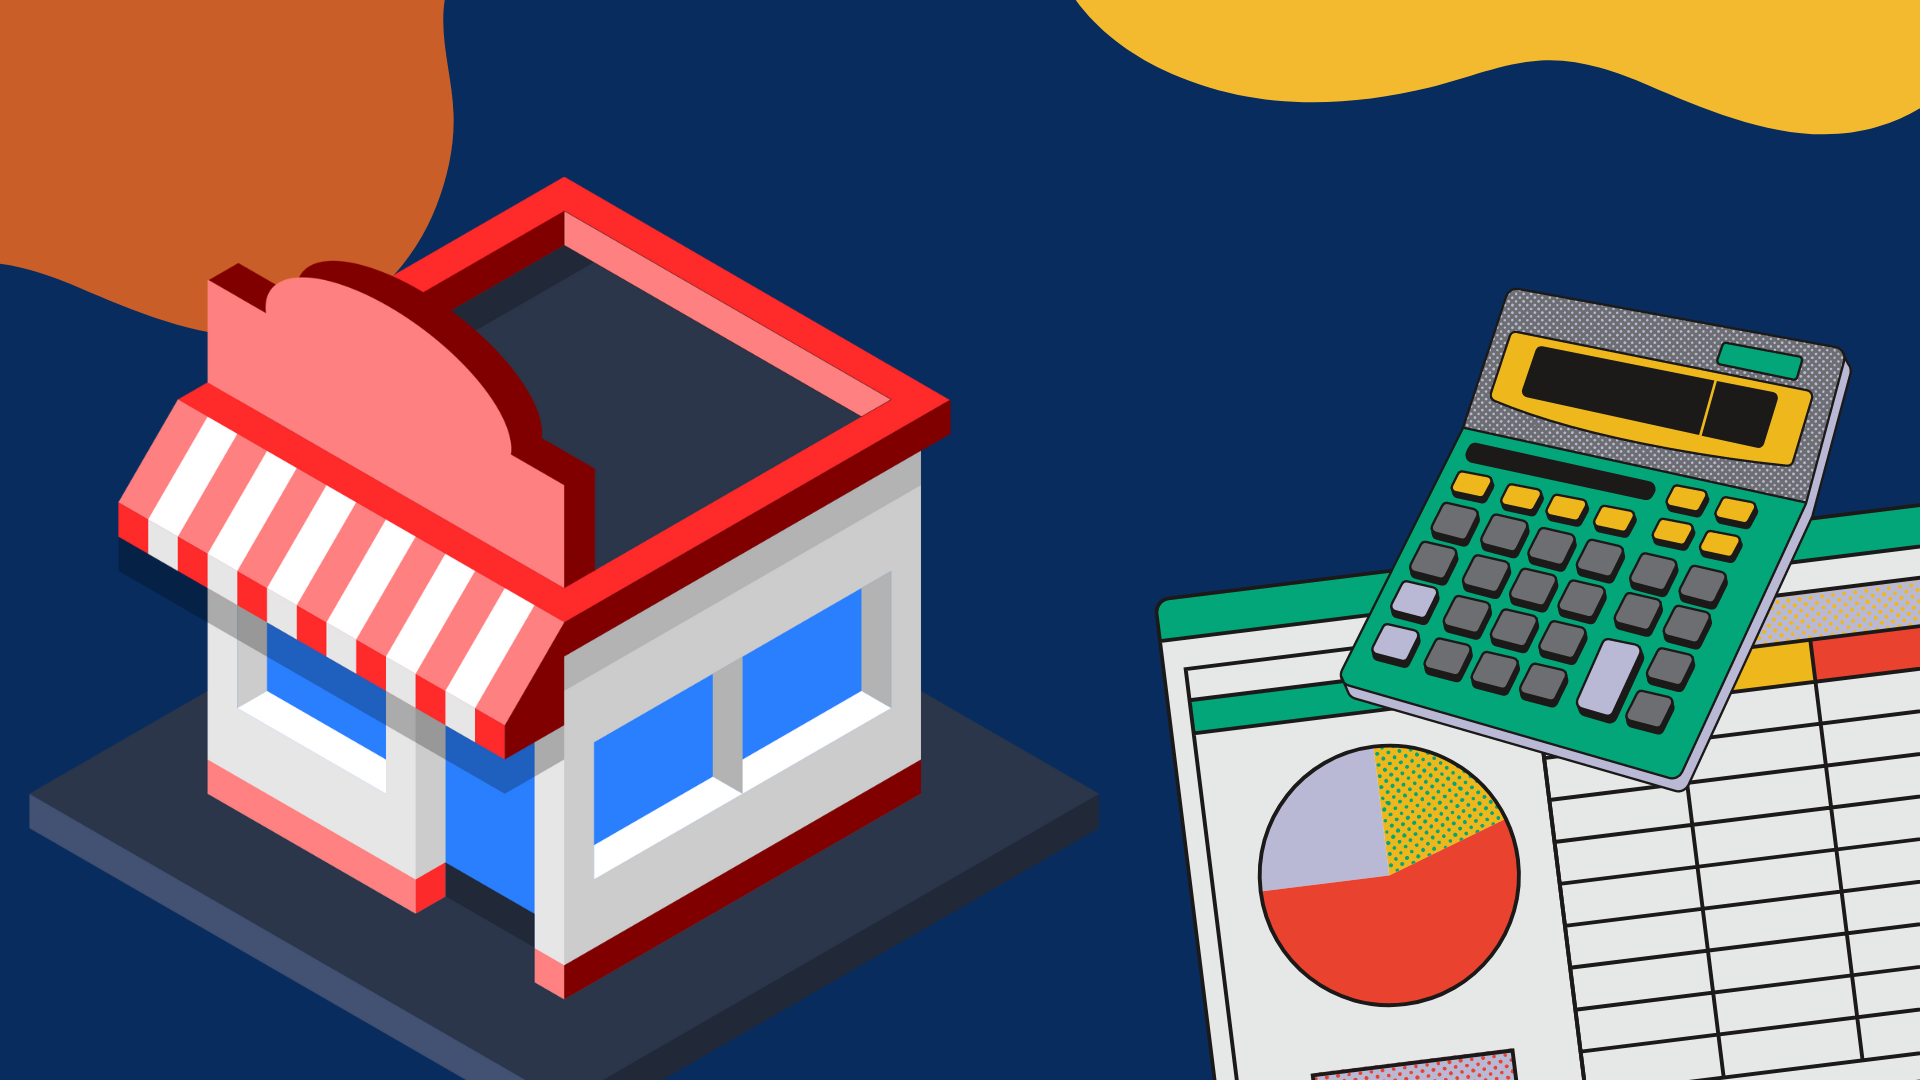

#**BigMart Product Sales Factors 📊🏪**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Impor Pustaka dan Memuat Dataset**

In [ ]:
# Impor pustaka
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Muat dataset
file_path = '/content/drive/My Drive/bigmarket/data/data.csv'
dataset = pd.read_csv(file_path)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/bigmarket/data/data.csv'

### **Eksplorasi Data: Menampilkan Baris Pertama**

In [ ]:
# Tampilkan beberapa baris pertama dataset
print("Beberapa baris pertama dari dataset:")
print(dataset.head().to_string(index=False))


Beberapa baris pertama dari dataset:
Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility             Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type       Outlet_Type  Item_Outlet_Sales
          FDA15         9.30          Low Fat         0.016047                 Dairy  249.8092            OUT049                       1999      Medium               Tier 1 Supermarket Type1          3735.1380
          DRC01         5.92          Regular         0.019278           Soft Drinks   48.2692            OUT018                       2009      Medium               Tier 3 Supermarket Type2           443.4228
          FDN15        17.50          Low Fat         0.016760                  Meat  141.6180            OUT049                       1999      Medium               Tier 1 Supermarket Type1          2097.2700
          FDX07        19.20          Regular         0.000000 Fruits and Vegetables  182.0950            OUT010           

### **Periksa Nilai yang Hilang**

In [ ]:
# Periksa nilai yang hilang
print("\nJumlah nilai yang hilang dalam dataset:")
print(dataset.isnull().sum())


Jumlah nilai yang hilang dalam dataset:
Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


### **Tabel Produk yang Dijual Berdasarkan Kategori**

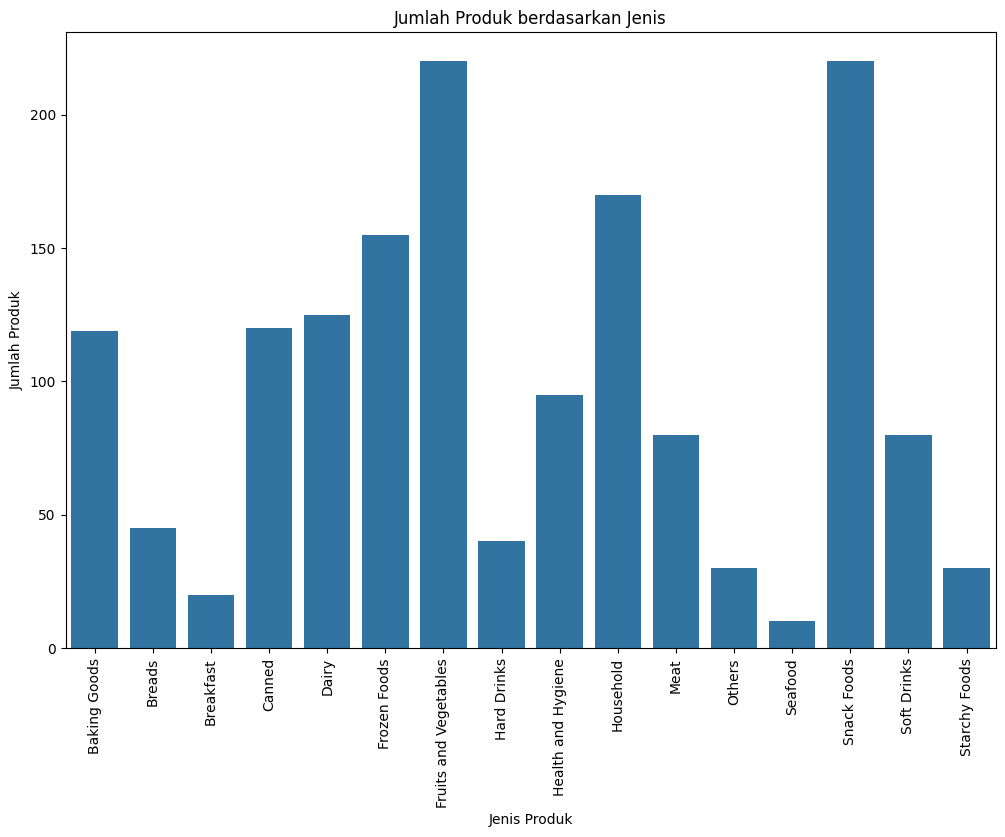

In [ ]:
# Tampilkan tabel produk yang dijual berdasarkan kategori
produk_per_kategori = dataset.groupby('Item_Type')['Item_Identifier'].unique().apply(lambda x: ', '.join(x)).reset_index()
produk_per_kategori.columns = ['Jenis Produk', 'Produk']

# Visualisasi tabel produk yang dijual berdasarkan kategori
plt.figure(figsize=(12, 8))
sns.barplot(x='Jenis Produk', y=produk_per_kategori['Produk'].apply(lambda x: len(x.split(', '))), data=produk_per_kategori)
plt.title('Jumlah Produk berdasarkan Jenis')
plt.xlabel('Jenis Produk')
plt.ylabel('Jumlah Produk')
plt.xticks(rotation=90)
plt.show()


### **Analisis Korelasi Antar Variabel**

<Figure size 1200x800 with 0 Axes>

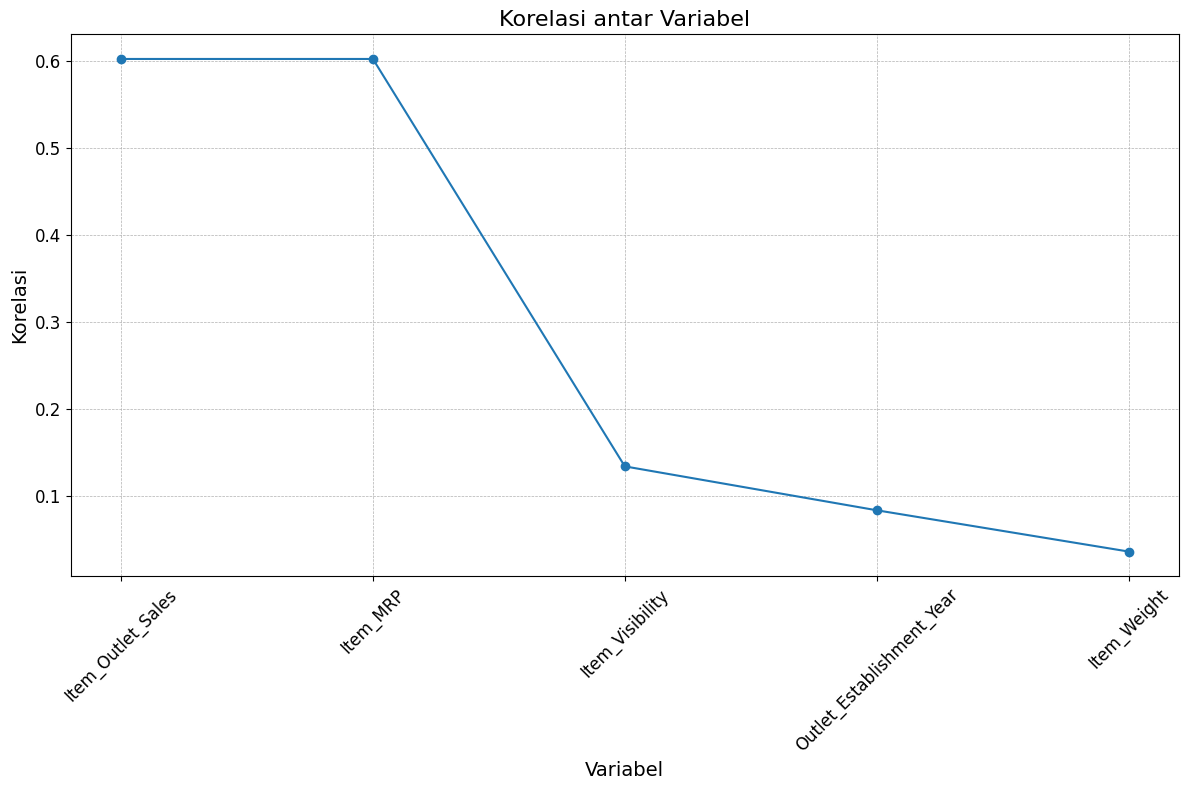

In [ ]:
# Pilih hanya kolom numerik
numerik_dataset = dataset.select_dtypes(include=[np.number])

# Analisis pengaruh faktor-faktor terhadap penjualan
plt.figure(figsize=(12, 8))
numerik_corr = numerik_dataset.corr()
numerik_corr = numerik_corr.abs().unstack().sort_values(ascending=False)
numerik_corr = numerik_corr[numerik_corr != 1]  # Menghapus korelasi yang bernilai 1 (korelasi dengan dirinya sendiri)
numerik_corr = numerik_corr.groupby(level=0).head(1)  # Mengambil korelasi tertinggi untuk setiap variabel
numerik_corr = numerik_corr.reset_index()
numerik_corr.columns = ['Variabel 1', 'Variabel 2', 'Korelasi']

# Visualisasi korelasi antar variabel sebagai grafik garis
plt.figure(figsize=(12, 8))
plt.plot(numerik_corr['Variabel 1'], numerik_corr['Korelasi'], marker='o')
plt.title('Korelasi antar Variabel', fontsize=16)
plt.xlabel('Variabel', fontsize=14)
plt.ylabel('Korelasi', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# Tampilkan grafik
plt.show()


### **Analisis Penjualan Berdasarkan Jenis Produk**

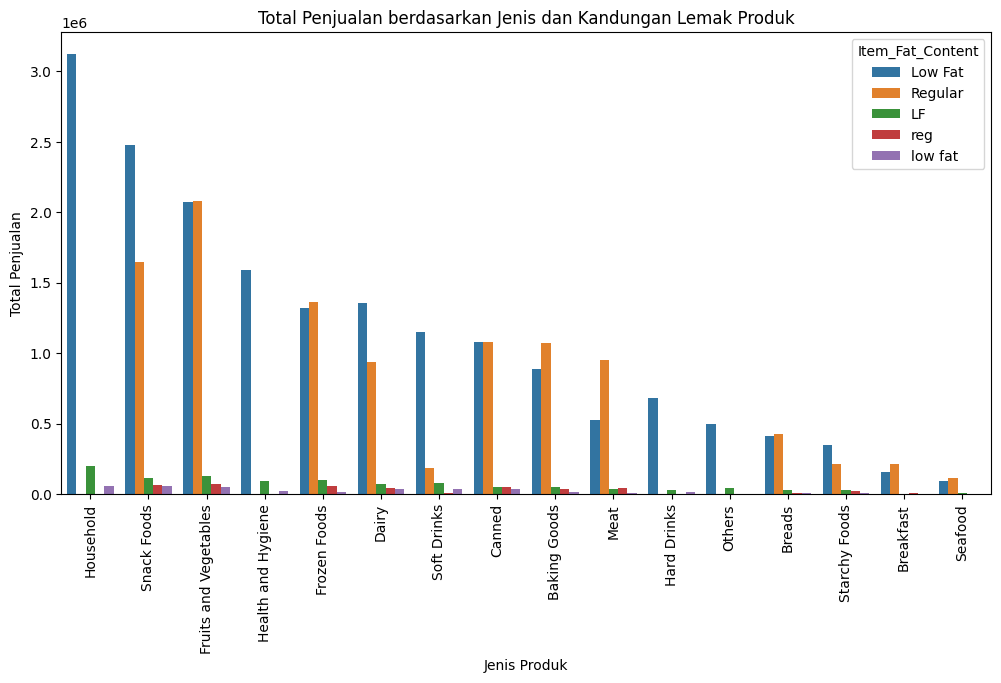

In [ ]:
# Analisis penjualan berdasarkan jenis produk
penjualan_berdasarkan_jenis_produk = dataset.groupby(['Item_Type', 'Item_Fat_Content'])['Item_Outlet_Sales'].sum().sort_values(ascending=False)

# Visualisasi penjualan berdasarkan jenis produk
plt.figure(figsize=(12, 6))
penjualan_berdasarkan_jenis_produk = penjualan_berdasarkan_jenis_produk.reset_index()
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', hue='Item_Fat_Content', data=penjualan_berdasarkan_jenis_produk)
plt.title('Total Penjualan berdasarkan Jenis dan Kandungan Lemak Produk')
plt.xlabel('Jenis Produk')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=90)
plt.show()


### **Analisis Lokasi Penjualan dan Ukuran Outlet**

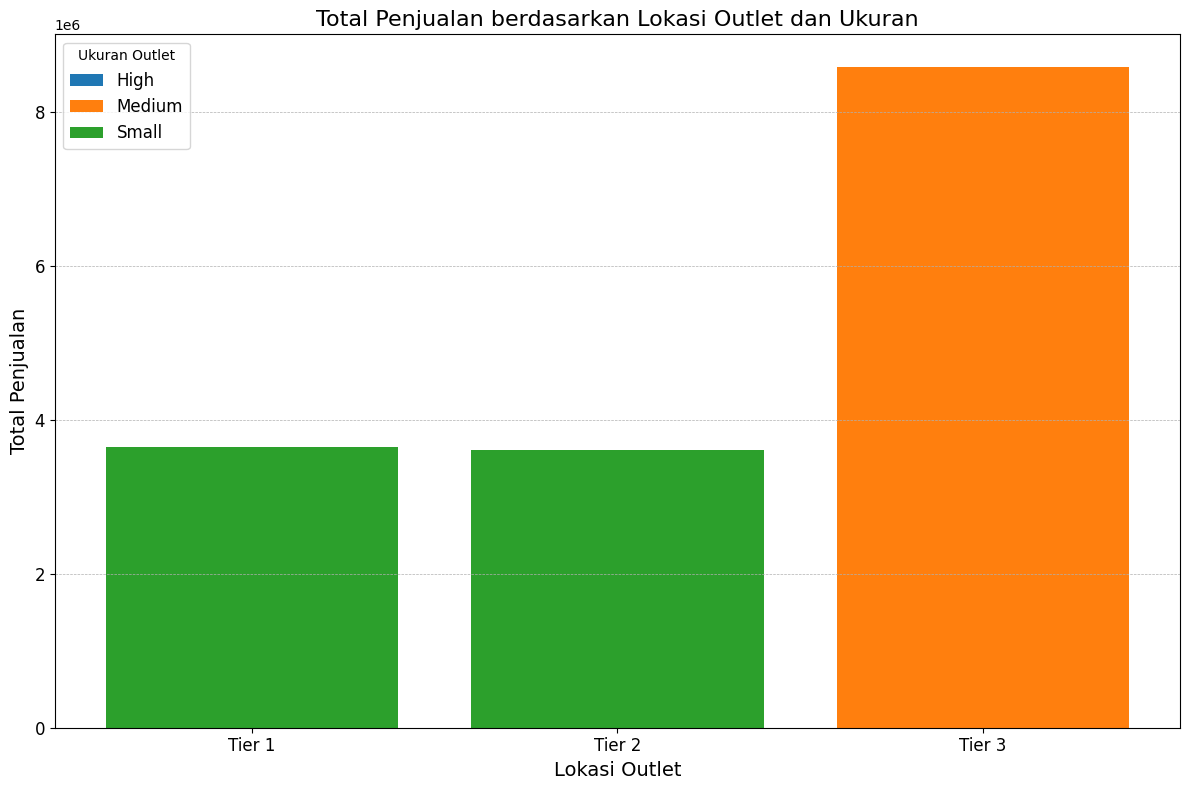

In [ ]:
# Analisis lokasi penjualan dan ukuran outlet
penjualan_berdasarkan_lokasi_outlet = dataset.groupby(['Outlet_Location_Type', 'Outlet_Size'])['Item_Outlet_Sales'].sum().unstack().reset_index()

# Visualisasi lokasi penjualan dan ukuran outlet dengan grafik batang
plt.figure(figsize=(12, 8))

# Plot setiap ukuran outlet sebagai grafik batang terpisah
for size in penjualan_berdasarkan_lokasi_outlet.columns[1:]:
    plt.bar(penjualan_berdasarkan_lokasi_outlet['Outlet_Location_Type'],
            penjualan_berdasarkan_lokasi_outlet[size],
            label=size)

# Menambahkan elemen grafis untuk memperjelas
plt.title('Total Penjualan berdasarkan Lokasi Outlet dan Ukuran', fontsize=16)
plt.xlabel('Lokasi Outlet', fontsize=14)
plt.ylabel('Total Penjualan', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Ukuran Outlet', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Tampilkan grafik
plt.show()